# Embeddings ... and word embeddings

Modeling text may not be as obvious as modeling images or audio. 

In images, inputs are a collection of pixels. In audio, it can be the vector obtained from a spectrogram (i.e. Fourier transform through time). Both representations share a common feature. Both are dense. 

When we consider the problem of natural language processing (NLP), things differ a little. 

Let us first check on the most simple representation of language. In particular, document representation.


## 1. Document representation

In text classification for example, we are given a description $x \in {\bf R}^d$ of a document $\delta$ and a fixed set of classes $y \in \{c_1, \dots, c_K\}$, for example the document topic. Given a new document, our goal is to predict the most probable class.

A very simple description of a document is the **bag-of-words** description. This representation transforms a complete text to a vector of $d$ predefined words. The set of predefined words is selected by the practicioner. For example, the list can consist of the set of all words in a given language. 

<b>Example 1:</b>
Suppose we are given four different documents belonging to the topics $y=\{\text{'economics'},\text{'technology'}\}$ and we select as our representation the following bag-of-words $x = \{\text{'market'}, \text{'stock'}, \text{'price'}, \text{'application'}, \text{'mobile'}, \text{'google'}\}$. We can count the number of times a certain term appears in that document and expect that this description is discriminative enough for identifying the document topic. Check the following example:

<table border="1">
<tr>
<td></td>
<td>market</td>
<td>stock</td>
<td>price</td>
<td>application</td>
<td>mobile</td>
<td>google</td>
</tr>
<tr>
<td>document 1($\text{'economics'}$)</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>document 2($\text{'economics'}$)</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>document 3($\text{'technology'}$)</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>3</td>
<td>1</td>
</tr>
<tr>
<td>document 4($\text{'technology'}$)</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
</tr>
</table>

In this representation, document 2 is represented by the vector (0,1,2,0,0,1). We can alternatively use a binary value representing whether a term appears or not in the document. In this last case document would be represesnted by (0,1,1,0,0,1).

Observe that this is a context free representation, i.e. the order of the words is not considered. Consider the sentences "Google reduces the prices of applications in App market" and "The number of aplications in Google App market with cheap prices is reduced by 20%". The representation for both sentences is the same, though the exact meaning of both sentences is completely different. However, this kind of representation may be enough for identifying that both refers to $\text{'technology'}$.

<div class = "alert alert-info" style = "border-radius:10px"> **NOTE: ** From a classification point of view, these representations convey very different meaning. In the case of word counting we are expecting the classification method con consider the exact appearance number of words of relevant. In some sense, we could say we are looking for a model that classify the text . For example, if we use a naive bayes approach we could look for the probability of generating the first word, then the second, etc. This will be consistent with the fact that we are considering the multiplicity of that word. This representation can be regarded as *multinomial representation*. On the other hand, if we use a binary representation, the meaning of this is very different. We are considering the words that appear in the document. But, the not appearance of a certain word is also important and, or interesting. In this case document 3 in the former example is characterized by the apearance of `application`, `mobile`, and `google`. But also by the not appearance of `market`, `stock`, and `price`.</div>

## 2. Word embeddings

A different approach for working with NLP is considering the embedding of single words, i.e. looking for a manifold where semantically similar words are mapped to nearby points. These are called vector space models.

The term `word embedding` was introduced by Bengio et al. at the begining of the 2000's. However it was Mikolov et al. in 2013 with the creation of **word2vec** who popularized word embeddings. From then, different word embeddings using deep learning appeared. It is worth mentioning **GloVe** from Pennington et al. (2014).


The term embedding naturally appears in any deep architecture where there is a bottleneck layer. The output of that bottleneck layer can be seen as low-dimensional embedding. This idea lies at the core of deep learning, and we have seen that before in the unsupervised notebook.

In this sense we can easily distinguish among task-oriented embeddings and general purpose embeddings:
+ Task oriented embeddings has the *Embedding layer* a one of the layers for a different task. This is, while solving the problem at hand, one also learns a suitable embedding for that task.

+ General purpose embeddings are designed to be used or transferred across different tasks.



## 3. A disection of the Embedding layer

Contrary to other embeddings, such as the ones we found in the image domain, the word embedding layer usually regarded as a mapping from a discrete set of objects (words) to a real valued vector, i.e. 

$$k\in\{1..N\} \rightarrow \mathbb{R}^d$$

Thus, we can represent the *Embedding layer* as $N\times d$ matrix, or just a table/dictionary.

$$
\begin{matrix}
word1: \\
word2:\\
\vdots\\
wordN: \\
\end{matrix}
\left[
\begin{matrix}
x_{1,1}&x_{1,2}& \dots &x_{1,d}\\
x_{2,1}&x_{2,2}& \dots &x_{2,d}\\
\vdots&&\\
x_{N,1}&x_{N,2}& \dots &x_{N,d}\\
\end{matrix}
\right]
$$

In this sense, the basic operation that an embedding layer has to accomplish is that given a certain word it returns the assigned code. And the goal in learning is to learn the values in the matrix.

In the learning process the matrix is initialized at random and learned using standard learning procedures, such as backpropagation.

## 4. Learning general purpose word embeddings

In this section, we are going to check two of the most well known strategies for learning general purpose embeddings, namely CBOW and Skip-gram.

The idea behind both methods is simple, the context around a word is a hint with respect the underlying semantic of that word, i.e. if we find the same context around the target words in different sentences but those words are different, most probably they convey the same meaning.

Strictly following this idea, we can define **CBOW** (Continuous Bag-of-Words): Given the context of a word, i.e. the $k$ words around the target, we want to infer what the target word is.


We can however change this order, and this will gives us the **Skip-gram**. In the skip-gram, given one word, we want to predict its context.

## 5. Coding a skip-gram model


In [2]:
import tensorflow as tf
import numpy as np
import zipfile

def read_data_as_chars(filename):
  """Extract the first file enclosed in a zip file as a list of characters"""
  with zipfile.ZipFile(filename) as f:
    words_data = tf.compat.as_str(f.read(f.namelist()[0]))
    chars_data = [ch for ch in words_data]
  return chars_data


from google.colab import files
print ("Upload file ... wiki106.txt.zip")
uploaded = files.upload()


Upload file ... wiki106.txt.zip


In [0]:
filename = 'wiki106.txt.zip'
data = read_data_as_chars(filename)

In [0]:
vocabulary = np.unique(data)

In [0]:
vocabulary

voc_dict = dict(zip(vocabulary, range(27)))

In [0]:
word_ids=list(map(lambda x: voc_dict[x],data))

In [0]:
vocabulary_size = len(vocabulary)
embedding_size = 10

In [7]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 3.5MB/s 


In [8]:
from tqdm import tqdm

# Parameters
learning_rate = 1e-4


tf.reset_default_graph() 

# tf Graph input
#learning_rate = tf.placeholder("float", name='lr')
x = tf.placeholder("int32", [1, 1], name='x')
y = tf.placeholder("float", [1, vocabulary_size], name='y')

c=0.1
embeddings = tf.Variable(c*tf.random_normal([vocabulary_size, embedding_size]), name="embeddings",dtype="float")
weights = tf.Variable(c*tf.random_normal([embedding_size, vocabulary_size]), name='W', dtype="float")
embedded_word_ids = tf.nn.embedding_lookup(embeddings,x)
emb_flat=tf.contrib.layers.flatten(embedded_word_ids)
output=tf.matmul(emb_flat, weights)

loss = tf.losses.sigmoid_cross_entropy(y,output)
#loss = tf.reduce_sum(tf.pow(output-y,2))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()


sess = tf.Session()
sess.run(init)
N = len(word_ids) #number of samples
context_size = 3

cost = []
for i in tqdm(range(100000)):
    #lea = 1e-6
    idx = np.random.randint(context_size,N-context_size,1)
    
    xs = word_ids[idx[0]]
    yids = word_ids[idx[0]-context_size:idx[0]+context_size+1]
    yids.pop(context_size)
    ys = np.zeros((vocabulary_size,1))
    ys[yids] = 1.
    yx = ys.ravel()
    sess.run(opt, feed_dict={x: np.array(xs,dtype=np.int32)[np.newaxis,np.newaxis], y: yx[np.newaxis,:]})
    
    if i%100==0:
        cost.append(sess.run(loss, feed_dict={x: np.array(xs)[np.newaxis,np.newaxis], y: yx[np.newaxis,:]}))

100%|██████████| 100000/100000 [01:00<00:00, 1639.40it/s]


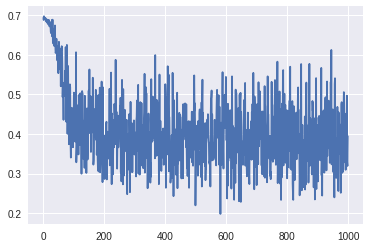

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(cost)

What happens when the target vocabulary is large?

## 5.1 Meet negative sampling

We create a new training set.

In [8]:
num_pos_data= 1
negative_multiplier = 5
context_size = 3
N = len(word_ids)

target_set = []
context_set = []
label = []
for i in range(num_pos_data):
    idx = np.random.randint(context_size,N-context_size,1)
    context = word_ids[idx[0]-context_size:idx[0]+context_size+1]
    print(context)
    idc = np.random.randint(-context_size,context_size,1)
    target_set.append(word_ids[idx[0]])
    context_set.append(word_ids[idx[0]+idc[0]])
    label.append(1.)
    #create negatives
    dif = np.setdiff1d(range(27),np.unique(context))
    for j in range(negative_multiplier):
        idn = np.random.randint(0,len(dif),1)
        target_set.append(word_ids[idx[0]])
        context_set.append(dif[idn[0]])
        label.append(0.)
    print(target_set,context_set,label)    

[2, 12, 25, 0, 25, 5, 1]
[0, 0, 0, 0, 0, 0] [12, 18, 7, 18, 3, 22] [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
num_pos_data= 100000
negative_multiplier = 5
context_size = 1
N = len(word_ids)

target_set = []
context_set = []
label = []
for i in range(num_pos_data):
    idx = np.random.randint(context_size,N-context_size,1)
    context = word_ids[idx[0]-context_size:idx[0]+context_size+1]
    idc = np.random.randint(-context_size,context_size,1)
    target_set.append(word_ids[idx[0]])
    context_set.append(word_ids[idx[0]+idc[0]])
    label.append(1.)
    #create negatives
    dif = np.setdiff1d(range(27),np.unique(context))
    for j in range(negative_multiplier):
        idn = np.random.randint(0,len(dif),1)
        target_set.append(word_ids[idx[0]])
        context_set.append(dif[idn[0]])
        label.append(0.)


In [11]:
from tqdm import tqdm

# Parameters
learning_rate = 1e-3


tf.reset_default_graph() 

# tf Graph input
#learning_rate = tf.placeholder("float", name='lr')
t = tf.placeholder("int32", [1, 1], name='t')
co = tf.placeholder("int32", [1, 1], name='c')
y = tf.placeholder("float", [1, 1], name='y')

c=0.1
context_embeddings = tf.Variable(c*tf.random_normal([vocabulary_size, embedding_size]), name="embeddings",dtype="float")
target_embeddings = tf.Variable(c*tf.random_normal([vocabulary_size, embedding_size]), name="embeddings",dtype="float")
weights = tf.Variable(c*tf.random_normal([embedding_size, vocabulary_size]), name='W', dtype="float")
embedded_context = tf.nn.embedding_lookup(context_embeddings,co)
embedded_target = tf.nn.embedding_lookup(target_embeddings,t)
context_flat=tf.contrib.layers.flatten(embedded_context)
target_flat=tf.contrib.layers.flatten(embedded_target)
output=tf.matmul(context_flat,tf.transpose(target_flat))


loss = tf.reduce_sum(tf.maximum(0.,y-output))
opt = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()


sess = tf.Session()
sess.run(init)
N = len(context_set) #number of samples

cost = []
for i in tqdm(range(30000)):
    #lea = 1e-6
    idx = np.random.randint(0,N,1)
    ts = target_set[idx[0]]
    coss = context_set[idx[0]]
    ys = label[idx[0]]
    sess.run(opt, feed_dict={t:np.array(ts)[np.newaxis,np.newaxis], co:np.array(coss)[np.newaxis,np.newaxis], y:np.array(ys)[np.newaxis,np.newaxis]})
    
    if i%100==0:
        cost.append(sess.run(loss, feed_dict={t:np.array(ts)[np.newaxis,np.newaxis], co:np.array(coss)[np.newaxis,np.newaxis], y:np.array(ys)[np.newaxis,np.newaxis]}))


  5%|▍         | 1393/30000 [00:03<01:09, 411.71it/s]


 10%|▉         | 2864/30000 [00:06<01:05, 415.70it/s]


 15%|█▍        | 4352/30000 [00:10<01:01, 418.18it/s]


 19%|█▉        | 5831/30000 [00:13<00:57, 418.63it/s]


 24%|██▍       | 7312/30000 [00:17<00:54, 419.55it/s]


 29%|██▉       | 8804/30000 [00:20<00:50, 420.24it/s]


 34%|███▍      | 10286/30000 [00:24<00:46, 420.59it/s]


 39%|███▉      | 11775/30000 [00:27<00:43, 420.88it/s]


 44%|████▍     | 13266/30000 [00:31<00:39, 421.04it/s]


 49%|████▉     | 14744/30000 [00:35<00:36, 420.99it/s]


 54%|█████▍    | 16217/30000 [00:38<00:32, 420.76it/s]


 59%|█████▉    | 17700/30000 [00:42<00:29, 420.66it/s]


 64%|██████▍   | 19182/30000 [00:45<00:25, 420.69it/s]


 69%|██████▉   | 20676/30000 [00:49<00:22, 420.98it/s]


 74%|███████▍  | 22155/30000 [00:52<00:18, 421.00it/s]


 79%|███████▉  | 23631/30000 [00:56<00:15, 421.00it/s]


 84%|████████▎ | 25110/30000 [00:59<00:11, 420.99it/s]


 89%|████████▊ | 26594/30000 [01:03<00:08, 421.10it/s]


 94%|█████████▎| 28086/30000 [01:06<00:04, 421.27it/s]


 99%|█████████▊| 29572/30000 [01:10<00:01, 421.36it/s]


100%|██████████| 30000/30000 [01:11<00:00, 421.35it/s]

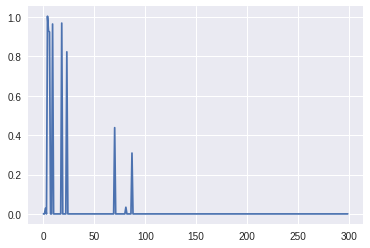

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(cost)

In [0]:
cemb=sess.run(context_embeddings)


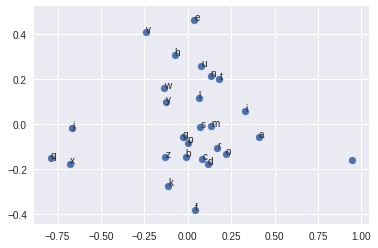

In [14]:
from sklearn.decomposition import PCA
temb=sess.run(context_embeddings)
pca = PCA(n_components=2)
Y = pca.fit_transform(temb)
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

## 6. Understanding and using the embedding.

Let us used a pretrained embedding. We will use a simple embedding detailed in `Improving Word Representations via Global Context and Multiple Word Prototypes`

In [19]:
from google.colab import files
print ("Upload file ... wordVectors.txt.zip")
uploaded = files.upload()

Upload file ... wordVectors.txt.zip


Saving wordVectors.txt.zip to wordVectors.txt.zip


In [0]:
import zipfile
filename = "wordVectors.txt.zip"
zip_ref = zipfile.ZipFile(filename, 'r')
zip_ref.extractall(".")
zip_ref.close()

In [21]:
!ls -l

total 60568
drwxr-xr-x 1 root root     4096 May 21 17:02 datalab
drwxr-xr-x 2 root root     4096 Jun 15 07:57 __MACOSX
-rw-r--r-- 1 root root   331366 Jun 15 07:31 wiki106.txt.zip
-rw-r--r-- 1 root root 47707097 Jun 15 07:57 wordVectors.txt
-rw-r--r-- 1 root root 13971372 Jun 15 07:57 wordVectors.txt.zip


In [0]:


import pandas as pd

filename = "wordVectors.txt"
df = pd.read_table(filename,delimiter=" ",header=None)

embedding=df.values[:,:-1]

In [23]:
from google.colab import files
print ("Upload file ... vocab.txt")
uploaded = files.upload()


Upload file ... vocab.txt


Saving vocab.txt to vocab.txt


In [0]:
filename = "vocab.txt"
f = open(filename,'r')
dictionary=dict()
for word in f.readlines():
    dictionary[word] = len(dictionary)
    
reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 

In [48]:
result = embedding[dictionary['king\n'],:]-embedding[dictionary['man\n'],:]+embedding[dictionary['woman\n'],:]
result = embedding[dictionary['soccer\n'],:]-embedding[dictionary['foot\n'],:]+embedding[dictionary['hand\n'],:]
result = embedding[dictionary['europe\n'],:]-embedding[dictionary['germany\n'],:]+embedding[dictionary['japan\n'],:]
result = embedding[dictionary['decade\n'],:]-embedding[dictionary['century\n'],:]+embedding[dictionary['day\n'],:]


import numpy as np
from scipy.spatial import distance
candidates=np.argsort(distance.cdist(embedding,result[np.newaxis,:],metric="seuclidean"),axis=0)

for i in range(3,8):
    idx=candidates[i][0]
    print(reverse_dictionary[idx])

day

evening

year

week

afternoon



In [45]:
dictionary.keys()

dict_keys(['UUUNKKK\n', 'the\n', ',\n', '.\n', 'of\n', 'and\n', 'in\n', '"\n', 'a\n', 'to\n', 'was\n', 'is\n', 'for\n', 'as\n', ')\n', '(\n', 'on\n', 'with\n', 'by\n', "'s\n", 'he\n', 'that\n', 'from\n', 'it\n', 'his\n', 'at\n', 'an\n', 'are\n', 'were\n', 'which\n', '<s>\n', '</s>\n', 'this\n', 'be\n', 'or\n', 'also\n', 'has\n', 'had\n', 'their\n', 'one\n', 'not\n', 'first\n', 'but\n', 'new\n', 'its\n', 'they\n', 'have\n', 'who\n', 'after\n', 'DGDGDGDG\n', "'\n", 'her\n', 'been\n', 'other\n', 'she\n', ';\n', 'two\n', 'when\n', '%\n', 'there\n', 'all\n', 'into\n', 'time\n', 'during\n', ':\n', 'more\n', 'school\n', 'years\n', 'most\n', 'can\n', 'some\n', 'only\n', 'over\n', 'many\n', 'used\n', 'such\n', 'would\n', 'up\n', 'out\n', 'city\n', 'may\n', 'him\n', 'world\n', 'where\n', '-\n', 'later\n', 'under\n', 'these\n', 'between\n', 'then\n', 'about\n', 'made\n', 'state\n', 'known\n', 'than\n', 'united\n', 'DGDG.DG\n', 'DGDGDG\n', 'however\n', 'while\n', 'year\n', 'being\n', 'states\n', '

<div class = "alert alert-info" style="border-radius:10px">**EXERCISE: ** Toy with word embeddings by creating new analogies.</div>